<a href="https://colab.research.google.com/github/abdohamdyy/Teeth-Classification/blob/main/Teeth_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect on google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teeth_DataSet.zip -d /content/drive/MyDrive

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
# Set constants
# Set constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
NUM_CLASSES = 7


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalization
    rotation_range=20,          # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalization for validation and test sets

train_gen = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Teeth_Dataset/Training',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Teeth_Dataset/Validation',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Teeth_Dataset/Testing',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


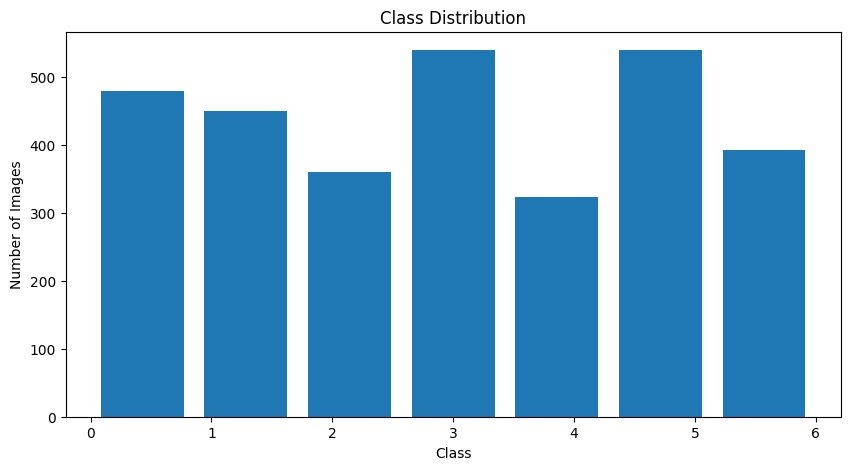

In [ ]:

# 2. Visualization
# Class distribution visualization

class_counts = train_gen.classes
plt.figure(figsize=(10, 5))
plt.hist(class_counts, bins=NUM_CLASSES, rwidth=0.8)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


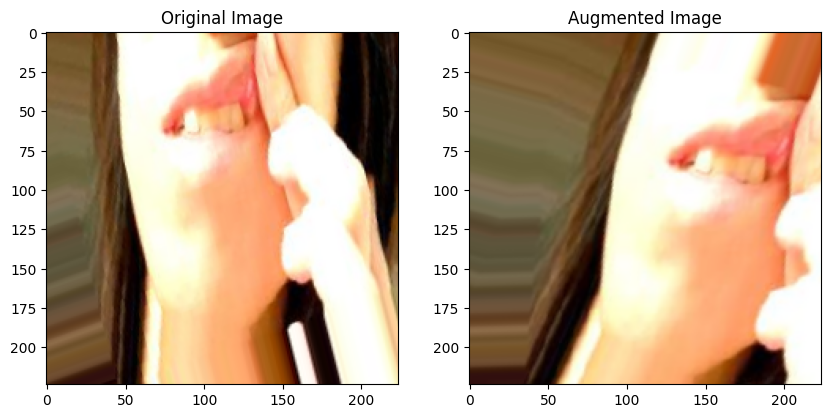

In [ ]:

# Visualizing original and augmented images
x_batch, y_batch = next(train_gen)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(x_batch[0])
axes[0].set_title('Original Image')
axes[1].imshow(train_datagen.random_transform(x_batch[0])) # Use datagen instead of generator
axes[1].set_title('Augmented Image')
plt.show()

In [ ]:
# Building the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       9,437,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,827,655 (37.49 MB)

 Trainable params: 9,827,655 (37.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Training the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=100
)


Epoch 1/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 68s 317ms/step - accuracy: 0.1759 - loss: 2.0503 - val_accuracy: 0.2432 - val_loss: 1.8624
Epoch 2/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 71s 276ms/step - accuracy: 0.2460 - loss: 1.8493 - val_accuracy: 0.2928 - val_loss: 1.7995
Epoch 3/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 55s 275ms/step - accuracy: 0.2982 - loss: 1.7625 - val_accuracy: 0.3833 - val_loss: 1.6113
Epoch 4/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 80s 267ms/step - accuracy: 0.3351 - loss: 1.6807 - val_accuracy: 0.4339 - val_loss: 1.4978
Epoch 5/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 82s 266ms/step - accuracy: 0.3977 - loss: 1.5463 - val_accuracy: 0.4426 - val_loss: 1.4584
Epoch 6/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 81s 261ms/step - accuracy: 0.4179 - loss: 1.5008 - val_accuracy: 0.4757 - val_loss: 1.3817
Epoch 7/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 82s 264ms/step - accuracy: 0.4658 - loss: 1.4299 - val_accuracy: 0.4893 - val_loss: 1.3663
Epoch 8/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 82s 264ms/step - accuracy: 0.4840 -

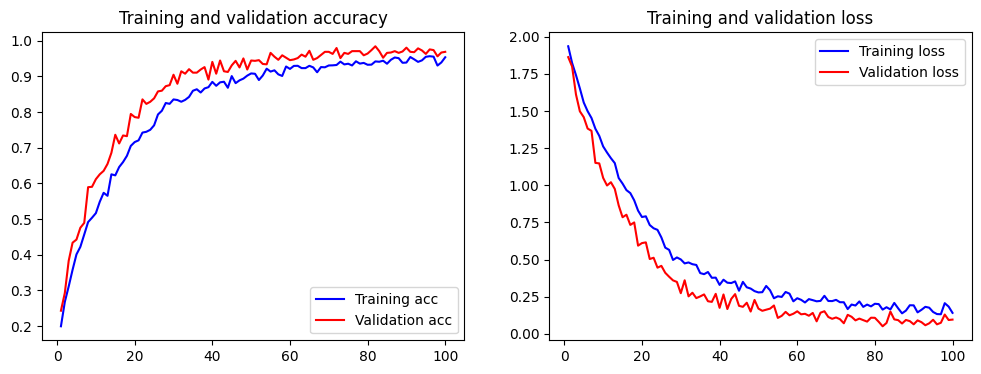

In [ ]:
# Plot training & validation accuracy/loss curves
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test accuracy: {test_acc:.2f}')

65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9711 - loss: 0.0714
Test accuracy: 0.97
